In [1]:
#Importing necessary modules
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sn
from sklearn import model_selection, metrics, linear_model, preprocessing
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mat

In [2]:
#Reading a file for model training
data = pd.read_csv("internship_train.csv")
data.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [3]:
#As we can see, dataframe is pretty big by row entries
#Let's see how many of them are unique in each column
data.shape

(90000, 54)

In [4]:
data.nunique()

0           500
1           500
2           500
3           500
4           500
5           500
6           199
7         90000
8             2
9           500
10          500
11          500
12          500
13        90000
14        90000
15        90000
16        90000
17        90000
18        90000
19        90000
20        90000
21        90000
22        90000
23        90000
24        90000
25        90000
26        90000
27        90000
28        90000
29        90000
30        90000
31        90000
32        90000
33        90000
34        90000
35        90000
36        90000
37        90000
38        90000
39        90000
40        90000
41        90000
42        90000
43        90000
44        90000
45        90000
46        90000
47        90000
48        90000
49        90000
50        90000
51        90000
52        90000
target    90000
dtype: int64

In [5]:
#So, the vast of the columns have completely different entries
#Those will be pretty useful for training, unless they're all the same in mean and std values
#Let's see it for ourselves
data_dr = data.copy()
data_dr.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


In [6]:
#That looks pretty decent, but we need also to seek for NaN or null entries
#because getting rid of them is the first keypoint of cleaning the data
data_dr.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
target    0
dtype: int64

Text(0, 0.5, 'count')

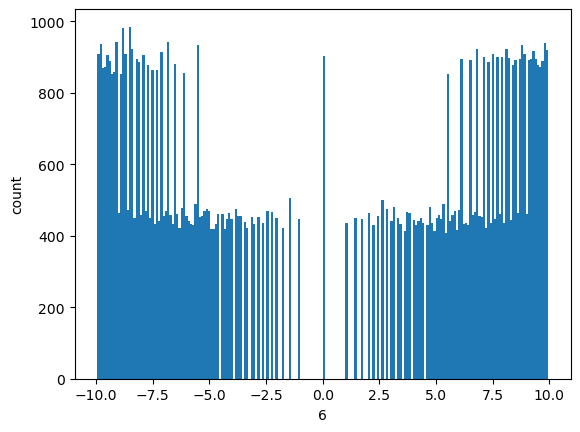

In [7]:
#That data is astoundingly clean, that's a surprise!
#Let's check for outliers by plotting histograms
#In order to not plotting each column, we'll plot columns with different
#number of unique values - one of each number, as it was displayed above
plt.hist(data_dr['6'], rwidth=8.0, bins=200)
plt.xlabel("6")
plt.ylabel("count")

Text(0, 0.5, 'count')

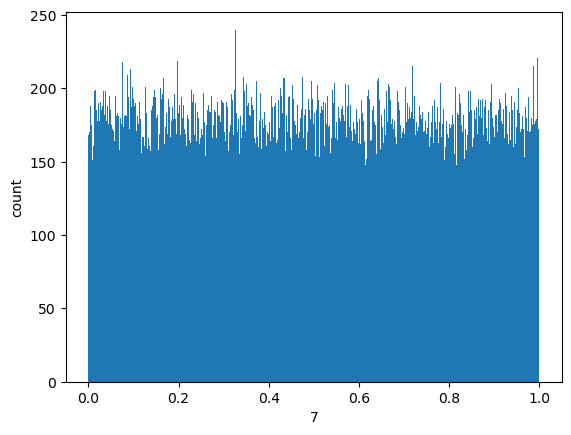

In [8]:
plt.hist(data_dr['7'], rwidth=8.0, bins=500)
plt.xlabel("7")
plt.ylabel("count")

Text(0, 0.5, 'count')

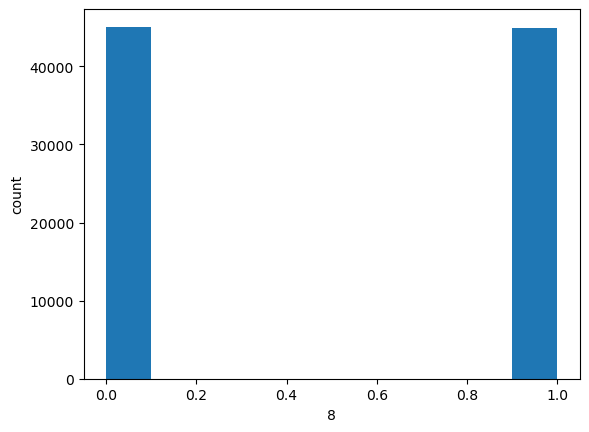

In [9]:
plt.hist(data_dr['8'], rwidth=8.0)
plt.xlabel("8")
plt.ylabel("count")

Text(0, 0.5, 'count')

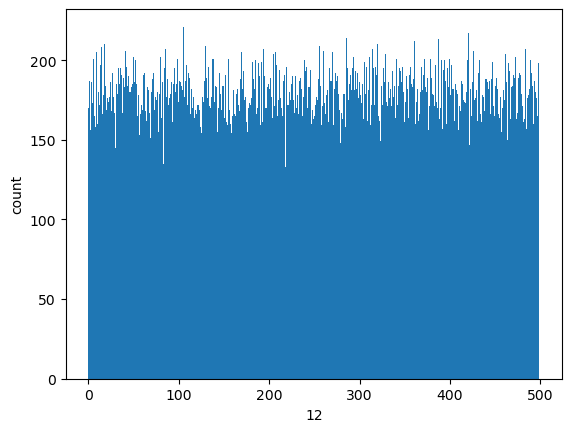

In [10]:
plt.hist(data_dr['12'], rwidth=8.0, bins=500)
plt.xlabel("12")
plt.ylabel("count")

In [11]:
#As we can see, data scattered across not in style of normal distribution.
#So, to make it more fitting and making our model more accurate,
#let's remove outliers by 2 standard deviation (95% of data)
def std_remove(d):
    out=pd.DataFrame()
    for i in d.columns.to_list():
        c=i
        uplim=d[c].mean()+2*d[c].std()
        lowlim=d[c].mean()-2*d[c].std()
        rem_d = d[(d[c]>lowlim)&(d[c]<uplim)][c]
        out=pd.concat([out,rem_d],axis="columns")
    return out


d=data_dr.copy()
cleared_data=std_remove(d)

In [12]:
#We have removed pretty much nothing, but better safe than sorry!
cleared_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


In [13]:
#In this phase, we can also try to remove outliers by using IQR
def iqr_remove(d):
    out=pd.DataFrame()
    for i in d.columns.to_list():
        c=i
        iqr=d[c].quantile(0.75) - d[c].quantile(0.25)
        uplim=d[c].quantile(0.75)+1.5*iqr
        lowlim=d[c].quantile(0.25)-1.5*iqr
        rem_d = d[(d[c]>lowlim)&(d[c]<uplim)][c]
        out=pd.concat([out,rem_d],axis="columns")
    return out
dd=cleared_data.copy()
data_wo_outliers = iqr_remove(dd)

In [14]:
#And here we have removed nothing, sadly(or fortunately?).
data_wo_outliers.shape

(90000, 54)

In [15]:
#Now that we are sure that our data is clean and all our features are valid and needed,
#we can divide data for training the model
x=data_wo_outliers.drop('target',axis='columns')
y=data_wo_outliers.target

In [16]:
#We could choose different regression model to build, but they all will give pretty much appr. values of mse, mean, score and etc.
#Finally, let's firstly fit it with unpreprocessed data
lin_reg=linear_model.LinearRegression()
lin_reg.fit(x,y)
pred=lin_reg.predict(x)
lin_rmse=np.sqrt(metrics.mean_squared_error(y,pred))

In [17]:
#Unfortunately, our root mean squared error is too high for the model to be acccurate
#So, let's try to preprocess this entries!
lin_rmse

28.887960642821337

In [18]:
#Firstly, let's use feature scaling, that could help reducing RMSE
scal = preprocessing.StandardScaler()
x_scal = scal.fit_transform(x)

In [19]:
scal_lin_reg=linear_model.LinearRegression()
scal_lin_reg.fit(x_scal,y)
scpred=scal_lin_reg.predict(x_scal)
scal_lin_rmse=np.sqrt(metrics.mean_squared_error(y,scpred))

In [20]:
#Sadly, it has been reduced only a little.
#Let us try another method
scal_lin_rmse

28.887960642821334

In [21]:
#For instance, let's generate polynomial features of our start features
poly=preprocessing.PolynomialFeatures()
x_poly=poly.fit_transform(x)

In [22]:
poly_lin_reg=linear_model.LinearRegression()
poly_lin_reg.fit(x_poly,y)
polpred=poly_lin_reg.predict(x_poly)
poly_lin_rmse=np.sqrt(metrics.mean_squared_error(y,polpred))

In [23]:
#Wow, RMSE has been reduced greatly!
#Let's see what's up with score
poly_lin_rmse

3.688998674956384e-10

In [24]:
#We'll be using cross validation to efficiently test our model's accuracy
cv=model_selection.ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
model_selection.cross_val_score(poly_lin_reg,x_poly,y,cv=cv)

array([1., 1., 1., 1., 1.])

E:\vl\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


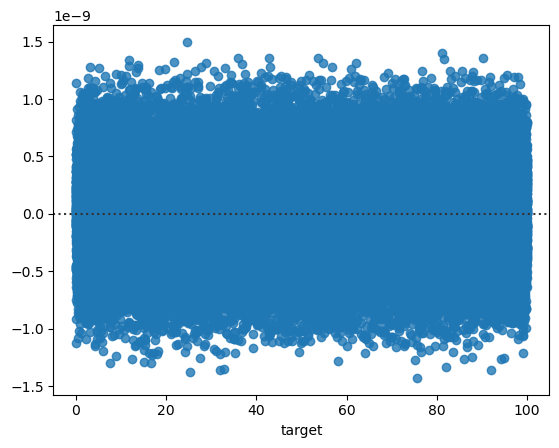

In [25]:
#That's unusual, but it could be randomization that is giving these great results.
#Let's see how our residuals changed after polynomial transformation
sn.residplot(y,polpred)
plt.show()

In [26]:
#We see that residuals tend to concentrate around the x-axis, which makes sense because they are negligible.
#At last, let's predict target value of hidden test
hid_test=pd.read_csv("internship_hidden_test.csv")
poly_hid=poly.fit_transform(hid_test)
hid_pred=poly_lin_reg.predict(poly_hid)

In [27]:
#And save it to a new .csv
filepath=Path('predictions.csv')
pd.DataFrame(hid_pred,columns=['target']).to_csv(filepath,index=False)